In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [133]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [134]:
df=df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [135]:
print(df.shape)

(700, 9)


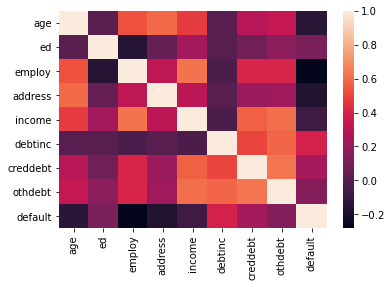

In [136]:
sns.heatmap(df.corr())

In [137]:
print(df.corr())

               age        ed    employ   address    income   debtinc  \
age       1.000000  0.022325  0.536497  0.597591  0.478710  0.016398   
ed        0.022325  1.000000 -0.153621  0.056919  0.235190  0.008838   
employ    0.536497 -0.153621  1.000000  0.322334  0.619681 -0.031182   
address   0.597591  0.056919  0.322334  1.000000  0.316245  0.011323   
income    0.478710  0.235190  0.619681  0.316245  1.000000 -0.026777   
debtinc   0.016398  0.008838 -0.031182  0.011323 -0.026777  1.000000   
creddebt  0.295207  0.088274  0.403694  0.208435  0.570199  0.501767   
othdebt   0.340217  0.165459  0.406091  0.226514  0.610659  0.584870   
default  -0.137657  0.114676 -0.282978 -0.164451 -0.070970  0.389575   

          creddebt   othdebt   default  
age       0.295207  0.340217 -0.137657  
ed        0.088274  0.165459  0.114676  
employ    0.403694  0.406091 -0.282978  
address   0.208435  0.226514 -0.164451  
income    0.570199  0.610659 -0.070970  
debtinc   0.501767  0.584870  0.3

In [138]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [139]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,16.650978
1,ed,4.981880
2,employ,5.703036
3,address,3.531411
4,income,10.477181
5,debtinc,8.639826
6,creddebt,3.718221
7,othdebt,6.450959


In [140]:
df1 = df.drop(['age'],axis=1)
Y = df1.iloc[:,:-1]
calc_vif(Y)

,variables,VIF
0,ed,4.028607
1,employ,4.365313
2,address,2.747323
3,income,9.347920
4,debtinc,5.476308
5,creddebt,3.371761
6,othdebt,5.585873


In [253]:
x=df1[['ed','employ','address','debtinc','creddebt','othdebt']]
y=df1.default

In [265]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np


In [266]:
score=cross_val_score(RandomForestClassifier(n_estimators=100, random_state = 10),x,y)
np.average(score)

0.7942857142857143

In [267]:
score=cross_val_score(DecisionTreeClassifier(random_state = 10),x,y)
np.average(score)

0.7100000000000001

In [268]:
score=cross_val_score(SVC(gamma='auto'),x,y)
np.average(score)

0.7614285714285713

In [269]:
score=cross_val_score(LogisticRegression(),x,y)
np.average(score)

0.8142857142857143

In [291]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 10)
model=RandomForestClassifier(n_estimators=100, random_state = 10) 
#model=LogisticRegression()
model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.7714285714285715

[[47  6]
 [10  7]]


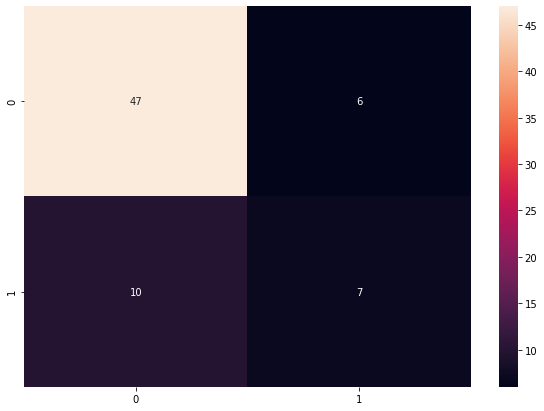

In [292]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel=("Predict")
plt.ylabel=("Truth")
print(cm)

In [286]:
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TP = cm[1][1]

In [287]:
Accuracy= (TP+TN) / (TP+FN+FP+TN) 
False_Positive_rate= FP / (FP+TP)
False_Negative_rate= FN / (FN+TP)

In [288]:
print(Accuracy)
print(False_Positive_rate)
print(False_Negative_rate)

0.8142857142857143
0.5555555555555556
0.2727272727272727


In [289]:
print(FP)

30


In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       156
         1.0       0.73      0.44      0.55        54

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.72       210
weighted avg       0.80      0.81      0.80       210



In [249]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test,pred)

In [222]:
precision

array([0.24285714, 0.6       , 1.        ])

In [223]:
recall

array([1.        , 0.44117647, 0.        ])

In [224]:
thresholds

array([0., 1.])

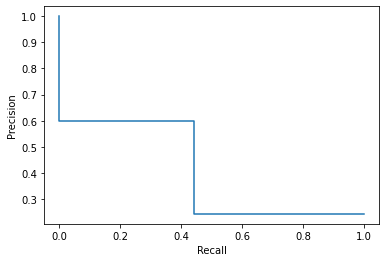

In [250]:
from sklearn.metrics import PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision, recall).plot()

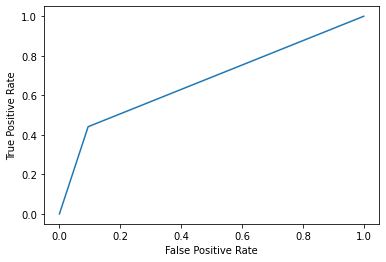

In [251]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test,pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

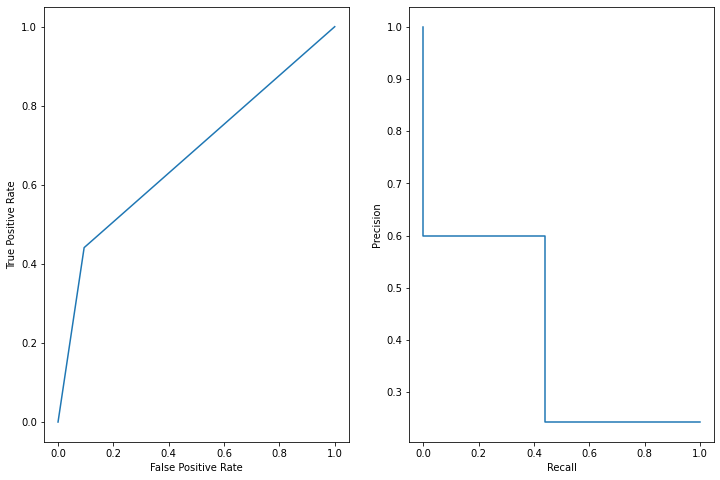

In [252]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()